**Import libraries**

In [230]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt 
import tensorflow as tf
from scipy.stats import pointbiserialr
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras


**Load data**

In [323]:
#@title
train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/train.csv")
test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/test.csv")

# Exploratory Data Analysis (EDA)

In [ ]:
#@title
train.head()

In [ ]:
#@title
test.head()

In [ ]:
#@title
train.info()

**Investige class imbalance between survived and not survived**

In [ ]:
#@title
survived_counts = train['Survived'].value_counts()

# Plot the bar chart
survived_counts.plot(kind='bar')

# Set the chart title and axes labels
plt.title('Survival Count')
plt.xlabel('Survived')
plt.ylabel('Count')

# Display the chart
plt.show()

**Investigate correlation of age and fare with survivors and non survivors**

In [ ]:
#@title
survived = train[train['Survived'] == 1]
survived_counts = survived['Age'].value_counts()
ages = survived_counts.index
count = survived_counts.values

nsurvived = train[train['Survived'] == 0]
nsurvived_counts = nsurvived['Age'].value_counts()
nages = nsurvived_counts.index
ncount = nsurvived_counts.values

# Plot the scatter plot
plt.scatter(nages, ncount, label='Non-Survivors')
plt.scatter(ages, count, label='Survivors')

plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()

plt.show()
plt.show()

In [ ]:
#@title
nsurvived = train[train['Survived'] == 0]
nsurvived_counts = nsurvived['Fare'].value_counts()
nfares = nsurvived_counts.index
ncount = nsurvived_counts.values

survived = train[train['Survived'] == 1]
survived_counts = survived['Fare'].value_counts()
fares = survived_counts.index
count = survived_counts.values

# Plot the scatter plot
plt.scatter(nfares, ncount, label='Non-Survivors')
plt.scatter(fares, count, label='Survivors')

plt.title('Fare Distribution Passengers')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.legend()

plt.show()
plt.show()

**Investigation of correlation of categorical features (sex, pclass, embarked)**

**Sex**

In [ ]:
#@title
survived = train[train['Survived'] == 1]
survived = survived['Sex'].value_counts()
survived.plot(kind='bar')

In [ ]:
#@title
nsurvived = train[train['Survived'] == 0]
nsurvived = nsurvived['Sex'].value_counts()
nsurvived.plot(kind='bar')

**Pclass**

In [ ]:
#@title
survived = train[train['Survived'] == 1]
survived = survived['Pclass'].value_counts()
survived.plot(kind="bar")

In [ ]:
#@title
nsurvived = train[train['Survived'] == 0]
nsurvived = nsurvived['Pclass'].value_counts()
nsurvived.plot(kind="bar")

**Embarked**

In [ ]:
#@title
survived = train[train['Survived'] == 1]
survived_embarked = survived['Embarked'].value_counts()
survived_embarked.plot(kind="bar")

In [ ]:
#@title
nsurvived = train[train['Survived'] == 0]
nsurvived_embarked = nsurvived['Embarked'].value_counts()
nsurvived_embarked.plot(kind="bar")

**Feature combinations (sex and pclass)**

In [ ]:
#@title
survived = train[train['Survived'] == 1]
survived = survived.groupby('Sex')['Pclass'].value_counts()
survived.plot(kind='bar')

In [ ]:
#@title
survived = train[train['Survived'] == 0]
survived = survived.groupby('Sex')['Pclass'].value_counts()
survived.plot(kind='bar')

**Missing Data Analysis**

In [ ]:
#@title
missing_values_count = train.isnull().sum()
columns_with_missing_values = missing_values_count[missing_values_count > 0].index

plt.figure(figsize=(10, 6))
sn.heatmap(train.isnull(), cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [ ]:
#@title
pearson_corr = train['Age'].corr(train['Fare'])
#point_biserial_corr, p_value = pointbiserialr(train['Sex'], train['Pclass'])

#print("Point-biserial correlation coefficient:", point_biserial_corr)
#print("p-value:", p_value)
print("Pearson correlation coefficient:", pearson_corr)

In [ ]:
#@title
age_data = train['Age']
age_data.plot(kind='box')


In [ ]:
#@title
survived_counts = train['Age'].value_counts()
ages = survived_counts.index
count = survived_counts.values

plt.scatter(ages, count, label='Survivors')

# Feature Engineering/Preprocessing

**Preprocessing: Handle missing values**


In [324]:
# drop 'Cabin' column
train = train.drop('Cabin', axis='columns') 

# drop two rows of Embarked 
train = train.drop(train[train['Embarked'].isnull() == True].index, axis="index") 

# Impute missing values with mean
train_age = train[train['Age'].notna()]['Age'] 
train_age_mean = train_age.mean()
train['Age'].fillna(train_age_mean, inplace=True)

# drop unnecessary columns
train = train.drop(['PassengerId', 'Ticket', 'Name'], axis='columns')

**Feature Engineering**

In [325]:
# convert 'Sex' values to binary
train['Sex_male'] = (train['Sex'] == 'male').astype(int)
train['Sex_female'] = (train['Sex'] == 'female').astype(int)

# one-hot encoding 'Embarked' column
train['EmbarkedS'] = ((train['Embarked'] == 'S')).astype(int)
train['EmbarkedC'] = ((train['Embarked'] == 'C')).astype(int)
train['EmbarkedQ'] = ((train['Embarked'] == 'Q')).astype(int)

train = train.drop(['Embarked', 'Sex'], axis='columns')

In [326]:
# scaling 'Age' and 'Fare'  columns
scaler = MinMaxScaler()
fare_values = train['Fare'].values.reshape(-1, 1)
age_values = train['Age'].values.reshape(-1, 1)

scaled_fare = scaler.fit_transform(fare_values)
scaled_age = scaler.fit_transform(age_values)

train['Fare'] = scaled_fare
train['Age'] = scaled_age

In [327]:
train

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Sex_female,EmbarkedS,EmbarkedC,EmbarkedQ
0,0,3,0.271174,1,0,0.014151,1,0,1,0,0
1,1,1,0.472229,1,0,0.139136,0,1,0,1,0
2,1,3,0.321438,0,0,0.015469,0,1,1,0,0
3,1,1,0.434531,1,0,0.103644,0,1,1,0,0
4,0,3,0.434531,0,0,0.015713,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0.334004,0,0,0.025374,1,0,1,0,0
887,1,1,0.233476,0,0,0.058556,0,1,1,0,0
888,0,3,0.367204,1,2,0.045771,0,1,1,0,0
889,1,1,0.321438,0,0,0.058556,1,0,0,1,0


**Building the machine learning model**

In [328]:
# Split the data
X_train = np.array(train[['Pclass', 'Sex_male', 'Sex_female', 'Fare', 'Age', 'Parch', 'SibSp', 'EmbarkedS', 'EmbarkedC', 'EmbarkedQ']])
y_train = np.array(train['Survived'])

In [329]:
# Define the model architecture
model = keras.Sequential()
model.add(keras.layers.Dense(100, activation='relu', input_shape=(10,)))
model.add(keras.layers.Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [330]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
28/28 [==============================] - 1s 2ms/step - loss: 0.6145 - accuracy: 0.6479
Epoch 2/100
28/28 [==============================] - 0s 2ms/step - loss: 0.5514 - accuracy: 0.7334
Epoch 3/100
28/28 [==============================] - 0s 2ms/step - loss: 0.5114 - accuracy: 0.7750
Epoch 4/100
28/28 [==============================] - 0s 3ms/step - loss: 0.4871 - accuracy: 0.7919
Epoch 5/100
28/28 [==============================] - 0s 2ms/step - loss: 0.4733 - accuracy: 0.7953
Epoch 6/100
28/28 [==============================] - 0s 2ms/step - loss: 0.4651 - accuracy: 0.7975
Epoch 7/100
28/28 [==============================] - 0s 2ms/step - loss: 0.4615 - accuracy: 0.7975
Epoch 8/100
28/28 [==============================] - 0s 2ms/step - loss: 0.4552 - accuracy: 0.8020
Epoch 9/100
28/28 [==============================] - 0s 2ms/step - loss: 0.4522 - accuracy: 0.7987
Epoch 10/100
28/28 [==============================] - 0s 2ms/step - loss: 0.4497 - accuracy: 0.8020
Epoch 11/

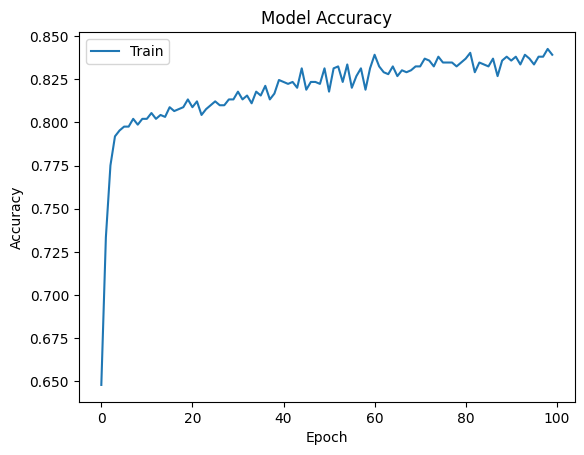

In [331]:
# Plot the accuracy
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

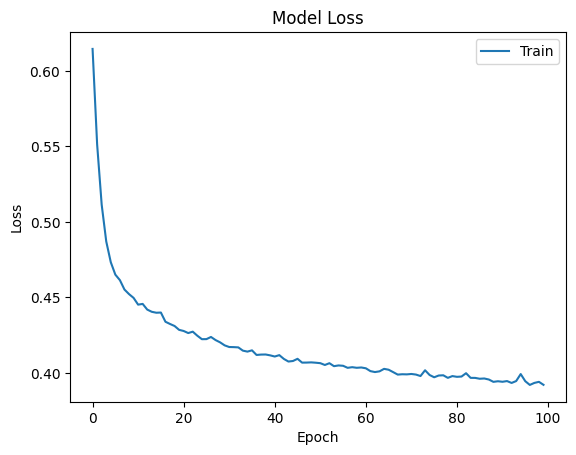

In [332]:
# Plot the loss
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [333]:
model.predict(X_train[8].reshape(1, 10))

1/1 [==============================] - 0s 93ms/step


array([[0.6336824]], dtype=float32)